# CS 663 Assignment 2 - KMeans

For own implementation of KMeans, please see KMeans.py in repo.

In this Jupyter Notebook, we start with portion 2 of the assignment: performance analysis.

First, we import all necessary libraries we expect to need throughout this assignment in the below cell.

In [1]:
from sklearn.datasets import make_blobs # used to generate clusters using the sklearn make_blobs function
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN # sklearn clustering algorithms
from KMeans import *  # own implementation of KMeans algorithms

import matplotlib.pyplot as plt # matplotlib
import seaborn as sns # seaborn

import pandas as pd # pandas dataframe
import numpy as np

As instructed, we generate 700 instances of data points in 2D space belonging to one of 4 clusters using the below provided code.

In [2]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In the below 2 cells, let's examine what X and cluster_assignments actually are:

In [3]:
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [4]:
cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

It would probably be more helpful to produce a chart of this output, so we do that with the help of matplotlib.

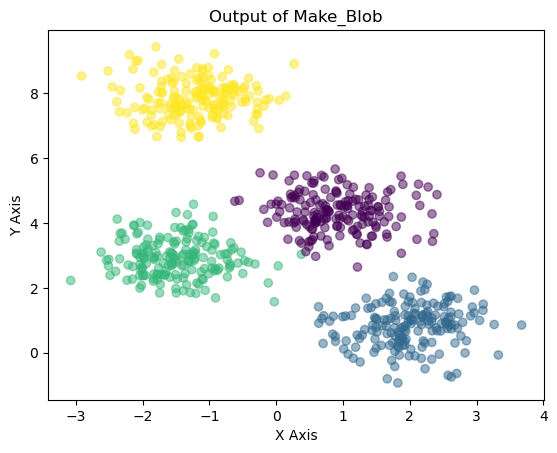

In [5]:
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_assignments, alpha=0.5)
plt.title("Output of Make_Blob")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

Now that we verified make_blob actually created what we wanted, we can see actually there are some instances that are perhaps not belonging to a cluster that we believe they should. Let's do a count of the elements within each cluster to see if maybe the number of elements within each cluster are equal

In [6]:
np.unique(cluster_assignments, return_counts=True)

(array([0, 1, 2, 3]), array([175, 175, 175, 175]))

Indeed, seems like the number of instances within each cluster is the same. At this point I expect there will likely be some differences between the output of KMeans from sklearn and my own implementation versus the output of this make_blob function. But let's continue with running KMeans from sklearn first:

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/Users/lawrence/anaconda3/envs/CS_663_v3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [8]:
kmeans.cluster_centers_

array([[-1.49970942,  2.90574194],
       [-1.20405793,  7.83785843],
       [ 1.9877063 ,  0.83188579],
       [ 0.90043932,  4.32217464]])

In [9]:
kmeans.labels_

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 2, 0, 3, 3, 1, 2, 1, 2, 2,
       0, 2, 0, 1, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 1, 2, 2, 3, 3, 2, 2, 0,
       2, 1, 1, 3, 1, 2, 3, 1, 3, 3, 3, 0, 2, 1, 3, 2, 0, 2, 0, 0, 1, 3,
       2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 0, 3, 3, 3, 0, 0, 0, 2, 2, 1, 3, 0,
       3, 0, 1, 1, 3, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 2, 3, 3, 0,
       2, 3, 3, 2, 3, 3, 1, 1, 0, 0, 3, 2, 0, 1, 0, 1, 1, 0, 2, 1, 3, 1,
       0, 2, 3, 1, 1, 0, 3, 3, 0, 3, 2, 2, 0, 2, 0, 1, 0, 2, 3, 0, 3, 2,
       3, 1, 1, 2, 3, 0, 1, 3, 3, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       3, 2, 3, 3, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 3, 3, 1, 0, 0,
       0, 3, 2, 2, 2, 1, 3, 3, 0, 0, 2, 1, 2, 1, 0, 1, 3, 3, 3, 1, 2, 2,
       3, 1, 2, 1, 1, 0, 3, 2, 2, 3, 1, 1, 1, 1, 3, 0, 1, 2, 2, 1, 3, 1,
       1, 3, 3, 2, 2, 3, 2, 0, 0, 0, 1, 2, 0, 3, 1, 3, 1, 1, 1, 0, 3, 0,
       0, 1, 1, 3, 0, 3, 3, 3, 0, 2, 3, 0, 3, 1, 3, 2, 2, 2, 3, 1, 3, 3,
       2, 1, 1, 2, 2, 0, 2, 2, 1, 3, 2, 1, 0, 3, 3,

In [10]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([174, 175, 175, 176]))

So at first glance we can already see that there will be at least 1 instance where there exists a mismatch between the output of make_blobs and sklearn's KMeans. Let's plot the KMeans output:

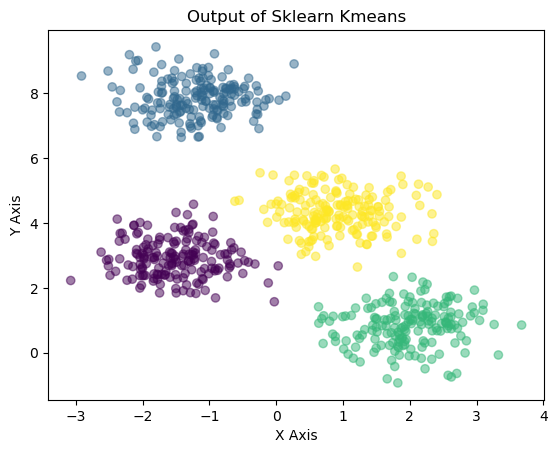

In [11]:
plt.scatter(x=X[:,0], y=X[:,1], c=kmeans.labels_, alpha=0.5)
plt.title("Output of Sklearn Kmeans")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [12]:
own_kmeans = Own_KMeans(k=4, max_iterations=300)
cluster_hypothesis, cluster_centroid = own_kmeans.fit(X)

In [13]:
cluster_centroid

[[-1.4997094181421273, 2.905741940858994],
 [1.9877063026473267, 0.8318857877497889],
 [0.9004393234899267, 4.32217463716],
 [-1.2040579337244173, 7.837858432492295]]

In [14]:
np.unique(cluster_hypothesis, return_counts=True)

(array([0, 1, 2, 3]), array([174, 175, 176, 175]))

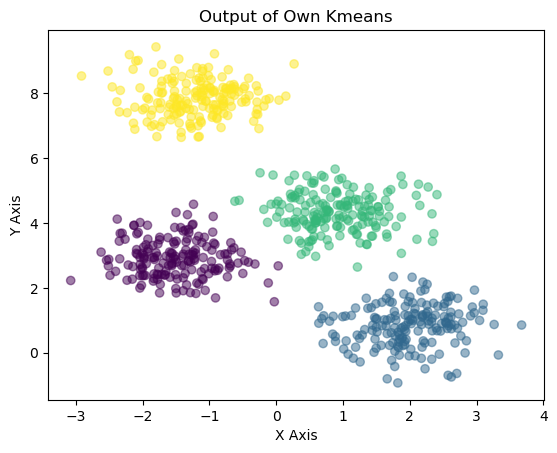

In [15]:
plt.scatter(x=X[:,0], y=X[:,1], c=cluster_hypothesis, alpha=0.5)
plt.title("Output of Own Kmeans")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [ ]:
def cluster_assignment_comparison(list1, list2):
    # total mismatches
    # mismatch for cluster 0
    # mismatch for cluster 1
    # mismatch for cluster 2
    # mismatch for cluster 3
    pass

## Chicago Taxi Data

In [12]:
taxi_df = pd.read_csv("Taxi_Trips__2013-2023_.csv")
taxi_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [13]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [14]:
taxi_df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


### Univariate Analysis

In [18]:
taxi_df["Pickup Community Area"].value_counts()

Pickup Community Area
8.0     21247
76.0    16000
32.0    15806
28.0    10661
6.0      3491
        ...  
57.0       29
64.0       28
9.0        26
63.0       24
18.0       19
Name: count, Length: 77, dtype: int64

In [19]:
taxi_df["Dropoff Community Area"].value_counts()

Dropoff Community Area
8.0     22577
32.0    15222
28.0    10057
6.0      4662
7.0      4074
        ...  
57.0       35
63.0       35
55.0       33
74.0       30
47.0       29
Name: count, Length: 77, dtype: int64

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

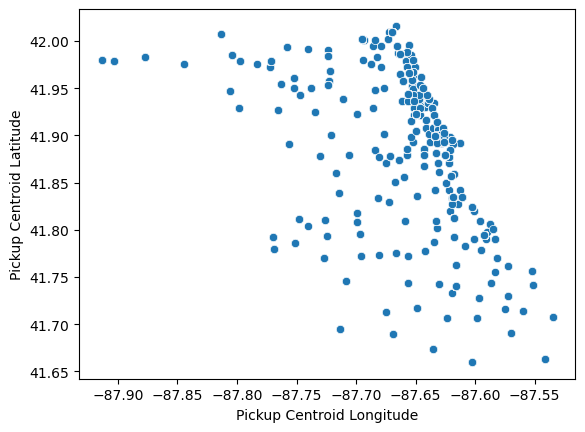

In [21]:


sns.scatterplot(data=taxi_df, x="Pickup Centroid Longitude", y="Pickup Centroid Latitude")

<Axes: xlabel='Dropoff Centroid Longitude', ylabel='Dropoff Centroid Latitude'>

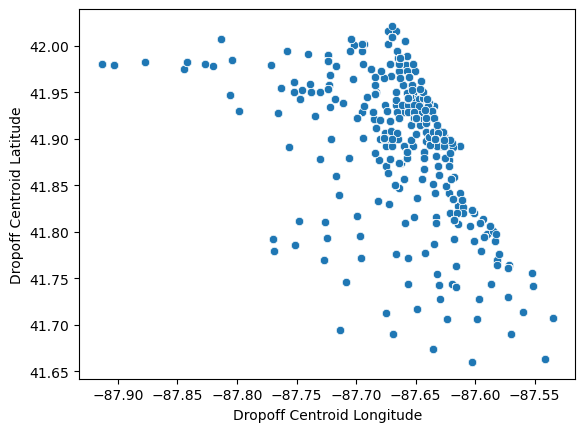

In [16]:
sns.scatterplot(data=taxi_df, x="Dropoff Centroid Longitude", y="Dropoff Centroid Latitude")

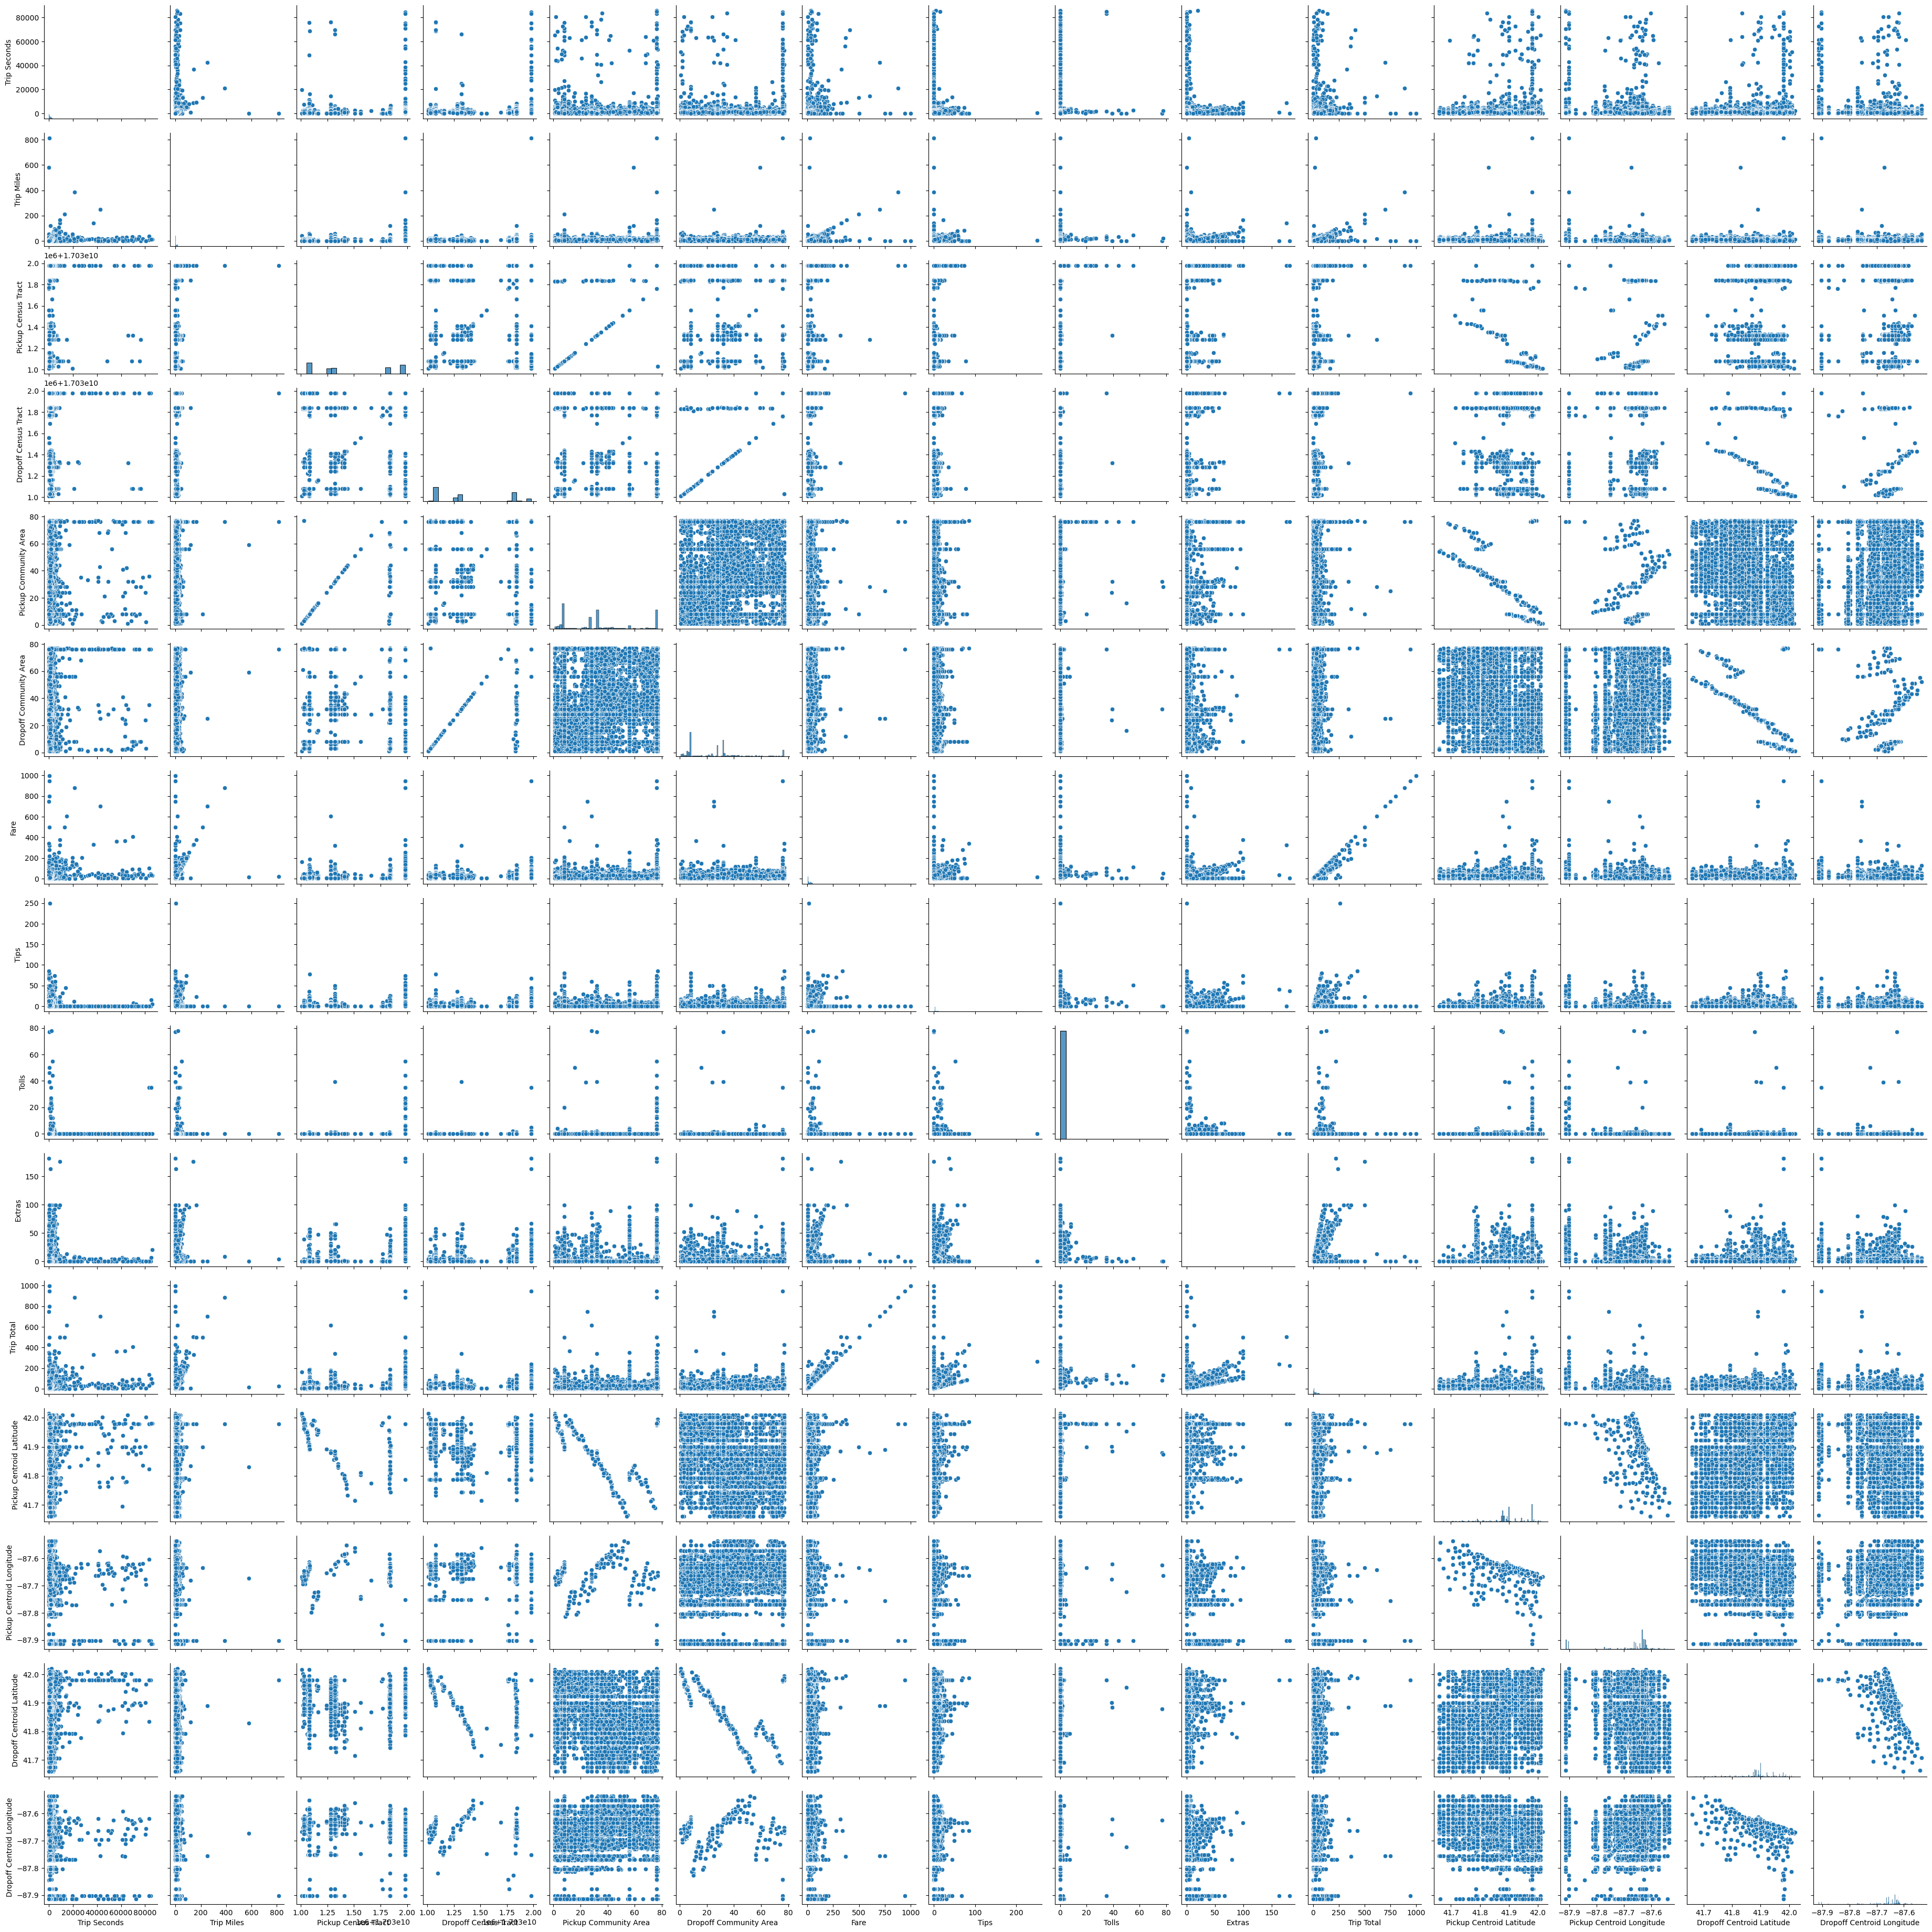

In [17]:
sns.pairplot(taxi_df)

In [26]:


taxi_kmeans = KMeans(n_clusters=10)
taxi_df = taxi_df.dropna()
kmeans.fit(taxi_df.loc[:,["Pickup Centroid Latitude", "Pickup Centroid Longitude"]])

/Users/lawrence/anaconda3/envs/CS_663_v3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

### Mopsi Data

In [41]:
mopsi_df = pd.read_csv("mopsi_data.txt", sep="\t", header=None, names=['Latitude','Longitude'])
mopsi_df

,Latitude,Longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [42]:
mopsi_df['Latitude'] = mopsi_df['Latitude']/10000
mopsi_df['Longitude'] = mopsi_df['Longitude']/10000
mopsi_df

,Latitude,Longitude
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437
...,...,...
13462,62.6042,29.7444
13463,62.5977,29.7443
13464,62.6050,29.7404
13465,62.5995,29.7426


<Axes: xlabel='Longitude', ylabel='Latitude'>

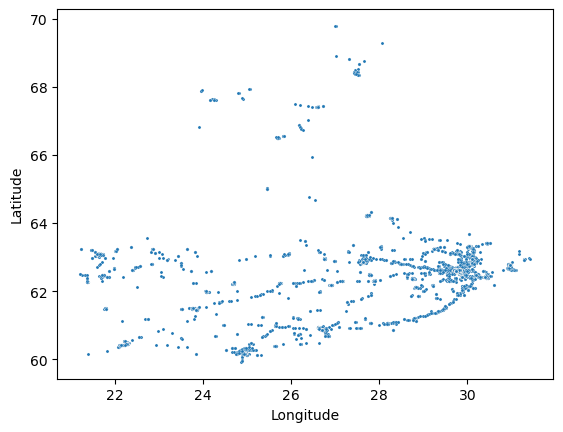

In [46]:
sns.scatterplot(data=mopsi_df, x="Longitude", y="Latitude", s=5)